In [2]:
# in first cell we load our packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# to load excel file. we use pd.read_excel(filename)
file = pd.read_excel('titanic_dataset.xlsx')

In [7]:
file.head() # to see top 5 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [8]:
file.tail() # to see last 5 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?
1308,3,0,"Zimmerman, Mr. Leo",male,29,0,0,315082,7.875,?,S,?,?,?


In [12]:
# - hash
# hash is used to comment

In [13]:
# .shape is to see the shape of file
file.shape

(1309, 14)

In [20]:
len(file)

1309

In [23]:
file['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

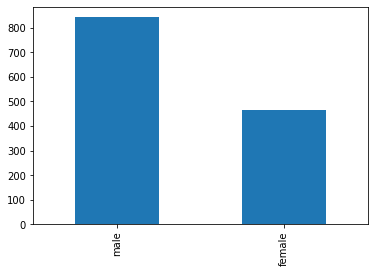

In [85]:
file['sex'].value_counts().plot.bar()
plt.show()

In [24]:
file['sex'].value_counts()/len(file) * 100

male      64.400306
female    35.599694
Name: sex, dtype: float64

In [15]:
file['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [22]:
file['survived'].value_counts()/len(file) * 100

0    61.802903
1    38.197097
Name: survived, dtype: float64

In [17]:
file['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

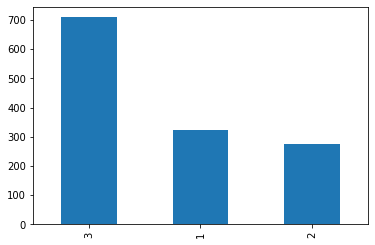

In [86]:
file['pclass'].value_counts().plot.bar()
plt.show()

In [25]:
file['pclass'].value_counts()/len(file) * 100

3    54.163484
1    24.675325
2    21.161192
Name: pclass, dtype: float64

In [41]:
file.groupby('pclass').agg({'survived' : 'count'})

,survived
pclass,
1,323
2,277
3,709


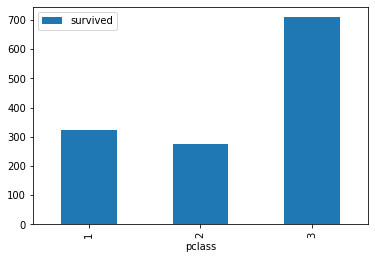

In [87]:
file.groupby('pclass').agg({'survived' : 'count'}).plot.bar()
plt.show()

In [18]:
file['embarked'].value_counts()

S    914
C    270
Q    123
?      2
Name: embarked, dtype: int64

In [27]:
file['embarked'].value_counts()/len(file) * 100

S    69.824293
C    20.626432
Q     9.396486
?     0.152788
Name: embarked, dtype: float64

In [40]:
file.groupby('embarked').agg({'survived' : 'count'})

,survived
embarked,
?,2
C,270
Q,123
S,914


In [32]:
file[file['sex'] == 'male']['survived'].value_counts()/len(file[file['sex'] == 'male']) * 100

0    80.901542
1    19.098458
Name: survived, dtype: float64

In [33]:
file[file['sex'] == 'female']['survived'].value_counts()/len(file[file['sex'] == 'female']) * 100

1    72.746781
0    27.253219
Name: survived, dtype: float64

In [94]:
file.groupby(['embarked', 'sex', 'survived']).agg({'survived' : 'count'})

survived
embarked sex    survived          
?        female 1                2
C        female 0               11
                1              102
         male   0              109
                1               48
Q        female 0               23
                1               37
         male   0               56
                1                7
S        female 0               93
                1              198
         male   0              517
                1              106

In [53]:
file.groupby(['pclass' , 'sex' , 'survived']).agg({'survived' : 'count'})

survived
pclass sex    survived          
1      female 0                5
              1              139
       male   0              118
              1               61
2      female 0               12
              1               94
       male   0              146
              1               25
3      female 0              110
              1              106
       male   0              418
              1               75

In [74]:
file.groupby(['pclass' , 'sex', 'survived']).agg({'survived' : 'count'}).groupby(level = 0).apply(lambda i : 100 * i / i.sum())

survived
pclass sex    survived           
1      female 0          1.547988
              1         43.034056
       male   0         36.532508
              1         18.885449
2      female 0          4.332130
              1         33.935018
       male   0         52.707581
              1          9.025271
3      female 0         15.514810
              1         14.950635
       male   0         58.956276
              1         10.578279

In [77]:
file.groupby([ 'embarked', 'pclass', 'survived']).agg({'survived' : 'count'})#.groupby(level = 0).apply(lambda i : 100 * i / i.sum())

survived
embarked pclass survived          
?        1      1                2
C        1      0               44
                1               97
         2      0               12
                1               16
         3      0               64
                1               37
Q        1      0                1
                1                2
         2      0                5
                1                2
         3      0               73
                1               40
S        1      0               78
                1               99
         2      0              141
                1              101
         3      0              391
                1              104

In [112]:
file.groupby([ 'embarked', 'pclass', ]).agg({'survived' : 'count'})#.groupby(level = 0).apply(lambda i : 100 * i / i.sum())

survived
embarked pclass          
?        1              2
C        1            141
         2             28
         3            101
Q        1              3
         2              7
         3            113
S        1            177
         2            242
         3            495

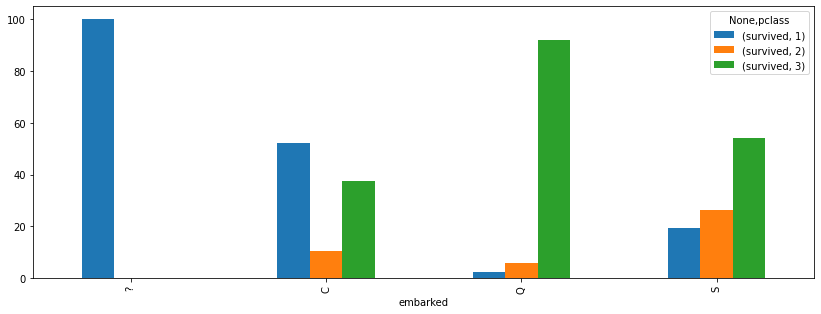

In [108]:
file.groupby([ 'embarked', 'pclass', ]).agg({'survived' : 'count'}). \
groupby(level = 0).apply(lambda i : 100 * i / i.sum()).unstack().plot.bar(figsize = (14, 5))
plt.show()

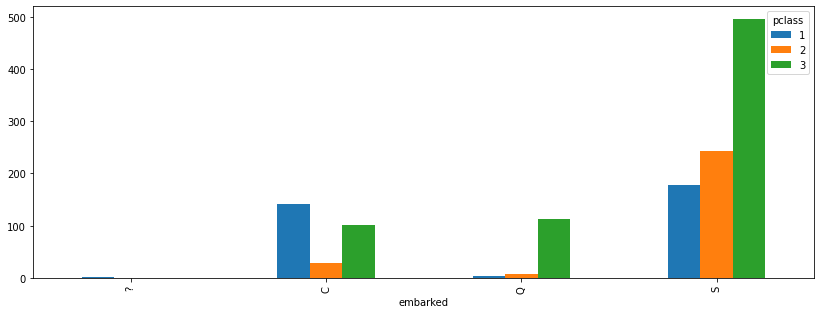

In [111]:
file.groupby([ 'embarked', 'pclass', ])['survived'].count(). \
unstack().plot.bar(figsize = (14, 5))
plt.show()